Topik
Gempa yang terjadi di Laut Indonesia

Background
Gempa bumi di laut terjadi karena pergerakan lempeng tektonik di bawah laut yang menyebabkan terbentuknya gelombang laut yang sangat besar. Ketika kedua lempeng bertabrakan, maka akan terjadi pola pergeseran naik dan turun yang menandakan kemungkinan terjadinya tsunami.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv('/kaggle/input/earthquakes-in-indonesia/katalog_gempa.csv')
df

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92882,2023/01/26,02:25:09.288,3.24,127.18,10,4.0,Talaud Islands - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
92883,2023/01/26,02:15:03.893,2.70,127.10,10,3.9,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN
92884,2023/01/26,01:57:08.885,-7.83,121.07,10,3.8,Flores Sea,NaN,NaN,NaN,NaN,NaN,NaN
92885,2023/01/26,01:46:21.009,3.00,127.16,10,4.1,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# create datetime column
f = lambda x: f'{x[0]} {x[1]}'
df['datetime'] = pd.to_datetime(df[['tgl', 'ot']].apply(f, axis=1))
df.drop(columns=['tgl', 'ot'], inplace=True)
df

,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2,datetime
0,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-01 21:02:43.058
1,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-01 20:58:50.248
2,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-01 17:43:12.941
3,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-01 16:24:14.755
4,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-01 16:20:37.327
...,...,...,...,...,...,...,...,...,...,...,...,...
92882,3.24,127.18,10,4.0,Talaud Islands - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-26 02:25:09.288
92883,2.70,127.10,10,3.9,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-26 02:15:03.893
92884,-7.83,121.07,10,3.8,Flores Sea,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-26 01:57:08.885
92885,3.00,127.16,10,4.1,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-26 01:46:21.009


Kira kira berapa besar magnitudo setiap harinya gempat terjadi di indonesia?

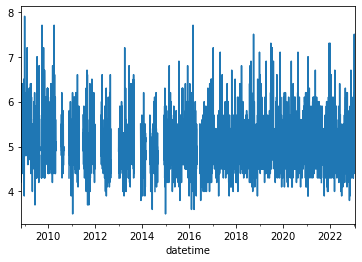

In [3]:
mag_by_date = df.set_index('datetime').resample('D')['mag'].max()
mag_by_date.plot();

Bagaimana sebaran data berdasarkan calendar dan tingginya magnitudo?

In [4]:
# different way to plot earthquake's magnitude
calendar = mag_by_date\
    .resample('30D')\
    .apply(list)\
    .to_list()[:-1]

calendar = np.array(calendar)
fig = px.imshow(calendar.T)
fig.show()

In [5]:
# Map of major earthquakes in Indonesia
big_quake = df[df.mag>5]

fig = go.Figure(data=go.Scattergeo(
    lat = big_quake.lat,
    lon = big_quake.lon,
    text = big_quake.datetime,
    marker = dict(
        color = big_quake.mag,
        opacity = 0.7,
        size = 3,
        colorbar = dict(
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            showticksuffix = "last",
        )
    )
))

fig.update_layout(
    geo = dict(
        scope = 'asia',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ 94.0, 142.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ -6.0, 11.0 ],
            dtick = 5
        )
    ),
    title='Peta Sebaran Gempa',
)
fig.show()

In [6]:
df.remark.value_counts()

Minahassa Peninsula - Sulawesi        9433
Sulawesi - Indonesia                  7897
Sumbawa Region - Indonesia            7312
Java - Indonesia                      6798
Northern Sumatra - Indonesia          5941
Southern Sumatra - Indonesia          5314
Banda Sea                             5003
Northern Molucca Sea                  4984
Seram - Indonesia                     4325
Halmahera - Indonesia                 3628
Irian Jaya Region - Indonesia         3137
South of Java - Indonesia             2503
Talaud Islands - Indonesia            2427
Flores Region - Indonesia             2338
Timor Region                          1947
Flores Sea                            1879
Near North Coast of Irian Jaya        1865
Sumba Region - Indonesia              1851
Irian Jaya - Indonesia                1666
Ceram Sea                             1535
Bali Region - Indonesia               1374
Southern Molucca Sea                  1271
Sunda Strait - Indonesia              1063
Off West Co

Berikut adalah list data banyakanya gempa di Indonesia berdasarkan daerah

In [7]:
df = df[df.strike1.notna()]
df.remark.value_counts()

Banda Sea                             280
Southern Sumatra - Indonesia          230
Java - Indonesia                      207
Northern Sumatra - Indonesia          178
Northern Molucca Sea                  156
Minahassa Peninsula - Sulawesi        139
Sulawesi - Indonesia                  135
Halmahera - Indonesia                 121
Sumbawa Region - Indonesia            110
Talaud Islands - Indonesia            108
Irian Jaya Region - Indonesia          94
South of Java - Indonesia              89
Irian Jaya - Indonesia                 78
Sunda Strait - Indonesia               74
Southwest of Sumatra - Indonesia       68
Mindanao - Philippines                 65
Seram - Indonesia                      61
Off West Coast of Northern Sumatra     54
Near North Coast of Irian Jaya         53
Southern Molucca Sea                   47
Sumba Region - Indonesia               45
Flores Region - Indonesia              40
Timor Region                           36
Tanimbar Islands Reg. - Indonesia 